In [1]:
!pip install catboost

In [114]:
from catboost import CatBoostRegressor
from catboost import cv, Pool
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('df_result_2.csv')
df = df[df['ZOI_drug_NP'] > 0]

In [4]:
print(df[df['ZOI_drug']>= 60].shape)
df = df[df['ZOI_drug'] < 60]

(21, 25)


In [5]:
train, test = train_test_split(df,random_state=42)

In [6]:
df.columns

Index(['NP size_min', 'NP size_max', 'NP size_avg', 'ZOI_drug', 'ZOI_drug_NP',
       'NumHDonors', 'NumHAcceptors', 'NumHeteroatoms', 'ExactMolWt',
       'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge',
       'MinPartialCharge', 'NumRotatableBonds', 'NumAromaticRings',
       'NumAromaticHeterocycles', 'min_Incub_period, h', 'avg_Incub_period, h',
       'max_Incub_period, h', 'growth_temp, C', 'biosafety_level',
       'shape_spherical', 'shape_nanorods_and_triangles', 'shape_triangular',
       'gram_p'],
      dtype='object')

In [7]:
X = ['NP size_min', 'NP size_max', 'NP size_avg', 'ZOI_drug',
       'NumHDonors', 'NumHAcceptors', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'MinPartialCharge', 'NumRotatableBonds',
       'NumAromaticRings', 'NumAromaticHeterocycles', 'min_Incub_period, h',
       'growth_temp, C', 'biosafety_level', 'shape_spherical', 'gram_p']
y = ['ZOI_drug_NP']

In [8]:
train_data = Pool(data=train[X],
                  label=train[y],
                 )

In [9]:
test_data = Pool(data=test[X],
                  label=test[y],
                 )

In [10]:
params = {'eval_metric': 'RMSE',
          'loss_function': 'RMSE',
              'learning_rate': 0.02,
              'random_seed': 2007,
              'verbose':100}

In [11]:
from sklearn.metrics import r2_score

In [12]:
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 6.513788083
bestIteration = 478

Training on fold [1/5]

bestTest = 4.651186842
bestIteration = 497

Training on fold [2/5]

bestTest = 3.799334322
bestIteration = 776

Training on fold [3/5]

bestTest = 3.913076168
bestIteration = 503

Training on fold [4/5]

bestTest = 5.157970924
bestIteration = 671



In [13]:
cv_data.head()

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,19.030637,1.119003,19.045066,0.276075
1,1,18.753596,1.112116,18.761193,0.272555
2,2,18.498133,1.109848,18.493718,0.270784
3,3,18.223437,1.102600,18.211860,0.267528
4,4,17.999254,1.095922,17.977459,0.275067


In [14]:
cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
509,509,4.820241,1.097223,2.60865,0.227776


In [15]:
n_iters = cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]['iterations'].values[0]
n_iters

509

In [16]:
params = {'eval_metric': 'RMSE',
          'loss_function': 'RMSE',
              'learning_rate': 0.02,
              'random_seed': 2007,
              'verbose':100}

In [17]:
model = CatBoostRegressor(**params)

In [18]:
train_data.shape

(384, 17)

In [19]:
model.fit(train_data)

0:	learn: 9.3182649	total: 1.21ms	remaining: 1.21s
100:	learn: 4.8736665	total: 87.9ms	remaining: 783ms
200:	learn: 3.8159038	total: 173ms	remaining: 687ms
300:	learn: 3.3384436	total: 254ms	remaining: 590ms
400:	learn: 3.0095076	total: 338ms	remaining: 505ms
500:	learn: 2.7748987	total: 423ms	remaining: 421ms
600:	learn: 2.5712822	total: 500ms	remaining: 332ms
700:	learn: 2.3763342	total: 584ms	remaining: 249ms
800:	learn: 2.1968258	total: 689ms	remaining: 171ms
900:	learn: 2.0488741	total: 776ms	remaining: 85.3ms
999:	learn: 1.9207546	total: 862ms	remaining: 0us


In [20]:
test['y_pred'] = model.predict(test_data)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.metrics import r2_score

In [23]:
test['y_pred'] = model.predict(test_data)

In [24]:
test

,NP size_min,NP size_max,NP size_avg,ZOI_drug,ZOI_drug_NP,NumHDonors,NumHAcceptors,NumHeteroatoms,ExactMolWt,MaxAbsPartialCharge,...,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,shape_spherical,shape_nanorods_and_triangles,shape_triangular,gram_p,y_pred
318,8.0,20.0,13.5,15.000,15.00,1.0,5.0,8.0,372.054610,1.000000,...,24.00,36.00,48.0,37.0,2.0,0,1,0,1,16.058816
517,5.0,80.0,60.0,0.625,0.30,2.0,12.0,15.0,454.030014,0.476561,...,24.00,48.00,72.0,37.0,2.0,1,0,0,0,1.764513
453,8.0,20.0,13.5,8.000,8.00,5.0,14.0,14.0,733.461241,0.458937,...,24.00,36.00,48.0,37.0,2.0,0,1,0,0,10.968085
161,5.0,30.0,21.0,19.000,21.00,3.0,5.0,8.0,349.109627,0.479673,...,240.00,288.00,336.0,30.0,1.0,1,0,0,1,25.239627
519,5.0,80.0,60.0,0.625,0.30,4.0,6.0,9.0,365.104542,0.507967,...,24.00,36.00,48.0,37.0,2.0,1,0,0,1,1.177938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,8.0,20.0,13.5,7.000,10.00,11.0,15.0,15.0,484.238058,0.393567,...,48.00,60.00,72.0,30.0,2.0,0,1,0,0,13.847656
20,8.0,20.0,13.5,30.000,39.00,6.0,9.0,10.0,444.153266,0.509651,...,0.16,7.08,14.0,30.0,1.0,0,1,0,1,31.724832
521,15.0,30.0,28.0,0.250,0.25,8.0,12.0,12.0,477.316249,0.387562,...,24.00,36.00,48.0,37.0,2.0,1,0,0,1,-0.261766
354,8.0,20.0,13.5,7.000,13.00,2.0,7.0,7.0,290.137890,0.492704,...,24.00,48.00,72.0,37.0,2.0,0,1,0,0,11.542902


In [25]:
np.sqrt(mean_squared_error(test['ZOI_drug_NP'],test['y_pred']))

4.527163082633678

In [26]:
r2_score(test['ZOI_drug_NP'],test['y_pred'])

0.8066536870847152

In [27]:
cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
509,509,4.820241,1.097223,2.60865,0.227776


In [28]:
!pip install shap

In [29]:
import shap
shap.initjs()

In [30]:
train = train.reset_index(drop = True)

In [31]:
train['y_pred'] = model.predict(train[X])

In [32]:
train_an = train[['ZOI_drug_NP','y_pred']]
train_an['difference'] = np.sqrt((train_an['ZOI_drug_NP'] - train_an['y_pred'])**2)
train_an.sort_values(by = 'difference',ascending = False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ZOI_drug_NP,y_pred,difference
51,50.0,33.860666,16.139334
304,31.0,22.085290,8.914710
227,18.0,11.928114,6.071886
291,20.8,15.526540,5.273460
229,16.0,11.019296,4.980704
...,...,...,...
175,13.0,12.974656,0.025344
198,13.0,12.975792,0.024208
61,20.0,19.981821,0.018179
34,24.0,23.982195,0.017805


In [33]:
train_an['difference'].median()

0.9613590740822193

In [34]:
train_an

,ZOI_drug_NP,y_pred,difference
0,16.0,14.066268,1.933732
1,0.6,0.870807,0.270807
2,8.0,10.272171,2.272171
3,21.0,21.144578,0.144578
4,37.0,35.768430,1.231570
...,...,...,...
379,25.0,25.424901,0.424901
380,16.0,15.926811,0.073189
381,13.0,13.775654,0.775654
382,8.0,9.084080,1.084080


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

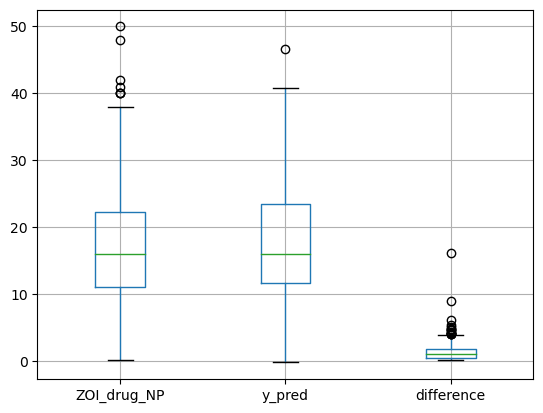

In [36]:
train_an.boxplot()
plt.show()

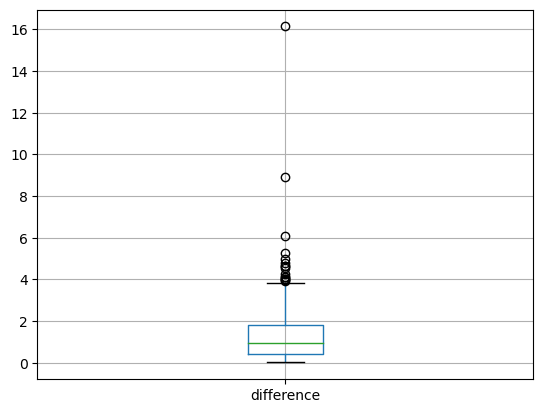

In [37]:
train_an.boxplot('difference')
plt.show()

In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X])

In [39]:
shap_values.shape

(384, 17)

In [40]:
train['ZOI_drug_NP'].mean()

16.903216145833333

In [41]:
explainer.expected_value

16.891217536247876

In [42]:
shap_values[0,:]

array([-1.89887628e+00, -2.04002680e+00, -1.42077286e+00,  1.93259645e+00,
        3.19805655e-01,  2.08284809e-01,  1.48405932e-01, -1.86586118e-01,
        5.81892301e-02,  3.54368520e-01, -1.90811396e-01, -1.40266071e-01,
        1.88862566e-01, -2.45185106e-01, -1.93553514e-03,  1.03110128e-01,
       -1.41129344e-02])

In [43]:
train[X].iloc[0,:]

NP size_min                 4.000000
NP size_max                10.000000
NP size_avg                 8.000000
ZOI_drug                   17.000000
NumHDonors                  1.000000
NumHAcceptors               6.000000
MaxAbsPartialCharge         0.486917
MinAbsPartialCharge         0.340723
MinPartialCharge           -0.486917
NumRotatableBonds           2.000000
NumAromaticRings            2.000000
NumAromaticHeterocycles     1.000000
min_Incub_period, h        48.000000
growth_temp, C             37.000000
biosafety_level             2.000000
shape_spherical             1.000000
gram_p                      0.000000
Name: 0, dtype: float64

In [44]:
print('train_an')
print(train_an.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values[0,:], train[X].iloc[0,:])

train_an
ZOI_drug_NP    16.000000
y_pred         14.066268
difference      1.933732
Name: 0, dtype: float64


In [45]:
print(train_an.iloc[1,:])
shap.force_plot(explainer.expected_value, shap_values[1,:], train[X].iloc[1,:])

ZOI_drug_NP    0.600000
y_pred         0.870807
difference     0.270807
Name: 1, dtype: float64


In [46]:
print(train_an.iloc[2,:])
shap.force_plot(explainer.expected_value, shap_values[2,:], train[X].iloc[2,:])

ZOI_drug_NP     8.000000
y_pred         10.272171
difference      2.272171
Name: 2, dtype: float64


In [47]:
print(train_an.iloc[51,:])

shap.force_plot(explainer.expected_value, shap_values[51,:], train[X].iloc[51,:])

ZOI_drug_NP    50.000000
y_pred         33.860666
difference     16.139334
Name: 51, dtype: float64


In [48]:
print(train_an.iloc[229,:])
shap.force_plot(explainer.expected_value, shap_values[229,:], train[X].iloc[229,:])

ZOI_drug_NP    16.000000
y_pred         11.019296
difference      4.980704
Name: 229, dtype: float64


In [49]:
print(train_an.iloc[249,:])
shap.force_plot(explainer.expected_value, shap_values[249,:], train[X].iloc[249,:])

ZOI_drug_NP     7.000000
y_pred         11.019296
difference      4.019296
Name: 249, dtype: float64


In [50]:
print(train_an.iloc[186,:])
shap.force_plot(explainer.expected_value, shap_values[186,:], train[X].iloc[186,:])

ZOI_drug_NP    17.000000
y_pred         12.342169
difference      4.657831
Name: 186, dtype: float64


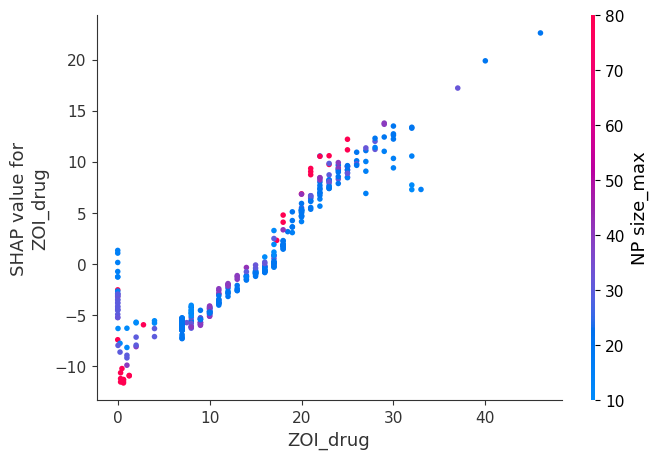

In [51]:
shap.dependence_plot("ZOI_drug", shap_values, train[X])

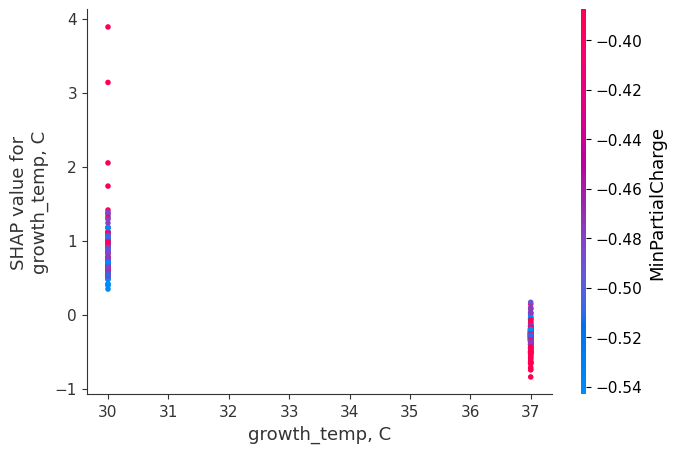

In [52]:
shap.dependence_plot("growth_temp, C", shap_values, train[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


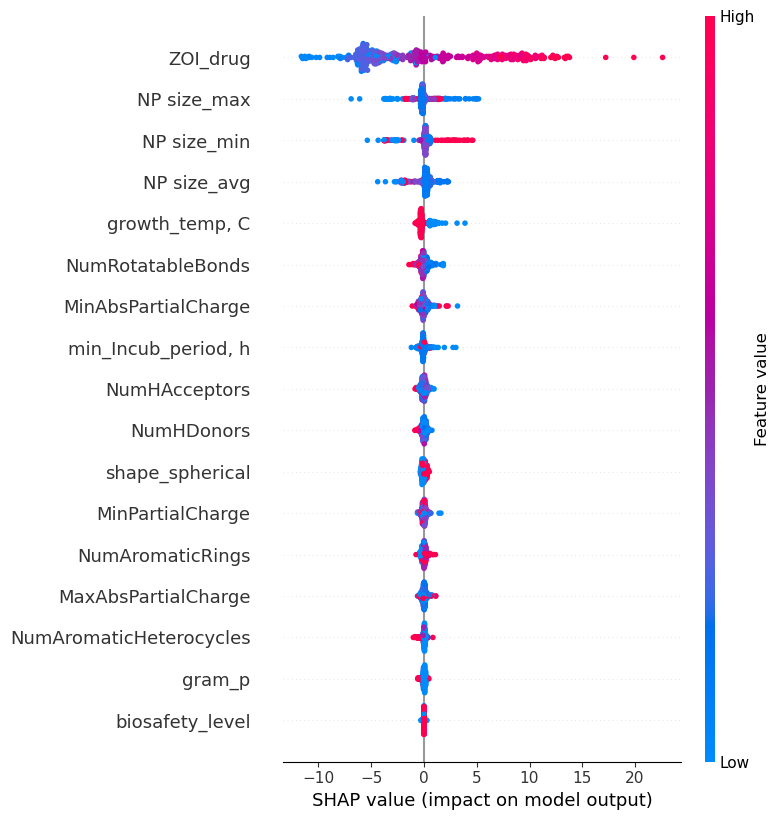

In [53]:
shap.summary_plot(shap_values, train[X])

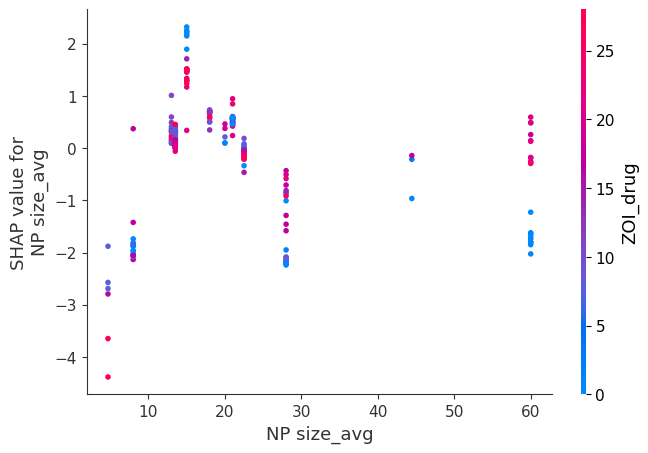

In [54]:
shap.dependence_plot("NP size_avg", shap_values, train[X])

In [55]:
gr = model.get_feature_importance(prettified=True)
gr

,Feature Id,Importances
0,ZOI_drug,50.980977
1,NP size_max,11.857566
2,NP size_min,10.725808
3,NP size_avg,7.469084
4,MinAbsPartialCharge,2.484929
5,NumRotatableBonds,2.083289
6,NumHAcceptors,2.015067
7,"min_Incub_period, h",1.899585
8,MaxAbsPartialCharge,1.731506
9,MinPartialCharge,1.681957


In [56]:
from sklearn.dummy import DummyRegressor

In [57]:
dummy_regr1 = DummyRegressor(strategy="mean")
dummy_regr1.fit(train[X],train[y])
dummy_regr1 = dummy_regr1.predict(test[X])
sm_for_d = np.sqrt(mean_squared_error(dummy_regr1,test[y]))
sm_for_d

10.336453865675864

In [58]:
X_train = train.drop(['ZOI_drug_NP'], axis=1).values
X_test = test.drop(['ZOI_drug_NP'], axis=1).values

y_train = train['ZOI_drug_NP'].values
y_test = test['ZOI_drug_NP'].values

In [59]:
from plot_metrics import *

## RandomForestRegressor

In [60]:
error_dict = {'R2_train': [], 'R2_test': [], 'RMSE_train': [], 'RMSE_test': []}
depth_range = range(1, 20)

for depth in depth_range:
    rfr = RandomForestRegressor(max_depth=depth, random_state=42)
    rfr.fit(X_train, y_train)
    
    error_dict.get('R2_train').append(r2_score(rfr.predict(X_train), y_train))
    error_dict.get('R2_test').append(r2_score(rfr.predict(X_test), y_test))
    
    error_dict.get('RMSE_train').append(np.sqrt(mean_squared_error(rfr.predict(X_train), y_train)))
    error_dict.get('RMSE_test').append(np.sqrt(mean_squared_error(rfr.predict(X_test), y_test)))

In [61]:
%matplotlib inline

max R2_train = 0.9903
max R2_test = 0.7795
--------------------
min RMSE_train = 0.9111
min RMSE_test = 4.4962


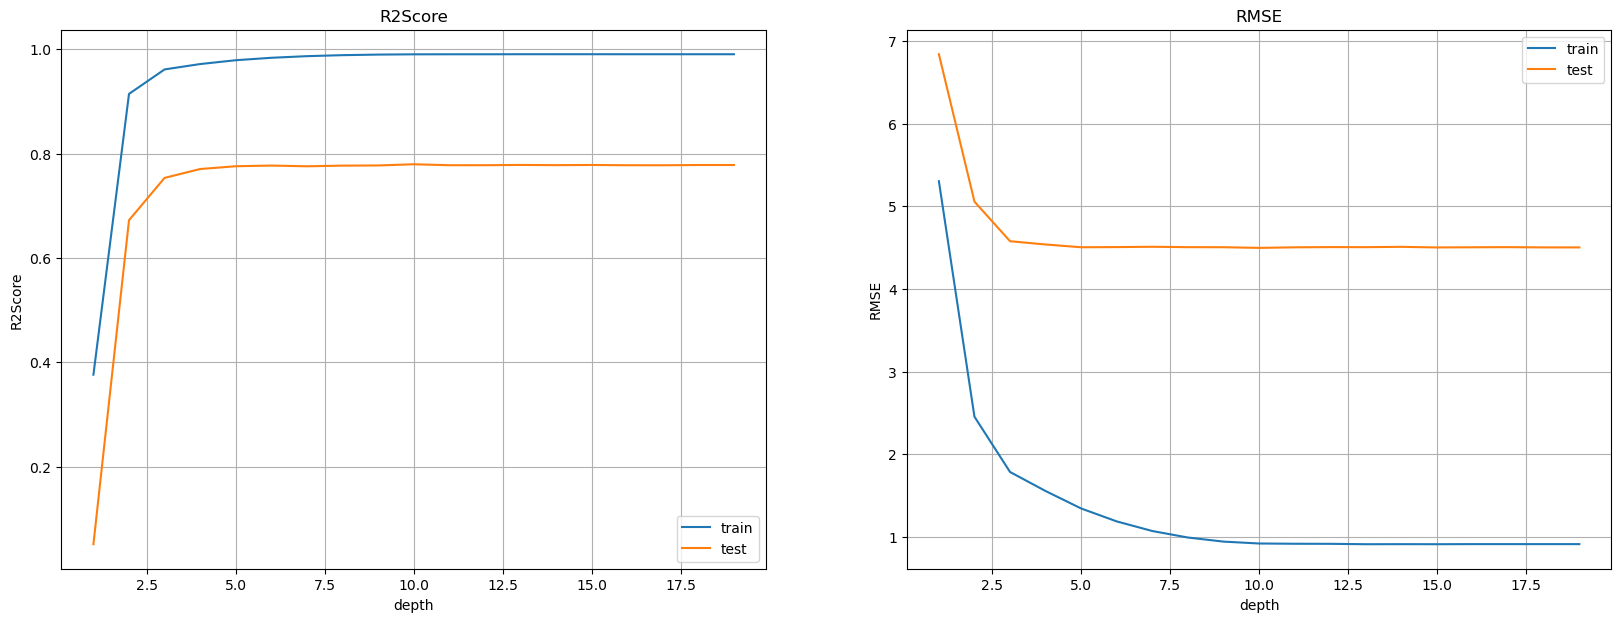

In [62]:
R2_RMSE_plot(error_dict, depth_range, 'depth')

## GradientBoostingRegressor

In [94]:
params = {
    "n_estimators": 500,
    "max_depth": 20,
    "min_samples_split": 20,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [95]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20, min_samples_split=20, n_estimators=500)

In [96]:
r2_score(reg.predict(X_test), y_test)

0.788337778333571

In [97]:
np.sqrt(mean_squared_error(reg.predict(X_test), y_test))

4.453250630968626

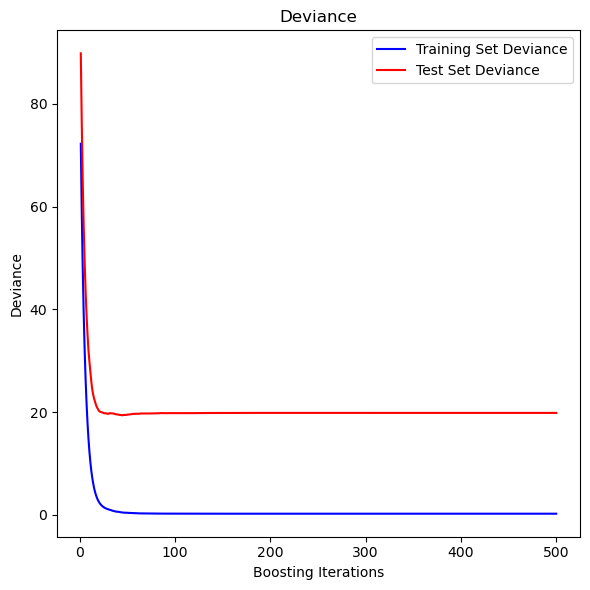

In [103]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## KNNRegressor

In [109]:
error_dict = {'R2_train': [], 'R2_test': [], 'RMSE_train': [], 'RMSE_test': []}
n_range = range(1, 50)

for n in n_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    error_dict.get('R2_train').append(r2_score(knn.predict(X_train), y_train))
    error_dict.get('R2_test').append(r2_score(knn.predict(X_test), y_test))
    
    error_dict.get('RMSE_train').append(np.sqrt(mean_squared_error(knn.predict(X_train), y_train)))
    error_dict.get('RMSE_test').append(np.sqrt(mean_squared_error(knn.predict(X_test), y_test)))

max R2_train = 0.9954
max R2_test = 0.217
--------------------
min RMSE_train = 0.6394
min RMSE_test = 7.535


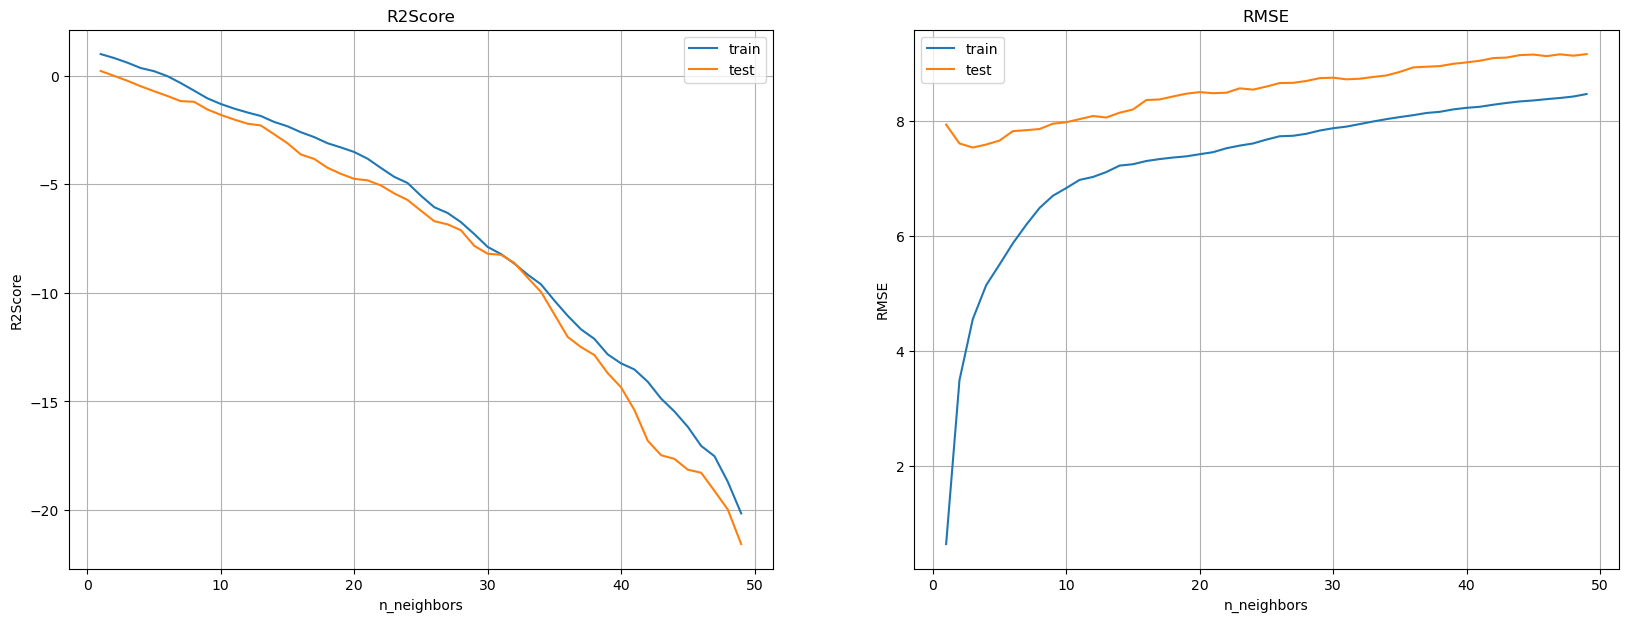

In [110]:
R2_RMSE_plot(error_dict, n_range, 'n_neighbors')

## VotingRegressor

In [116]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [117]:
r2_score(ereg.predict(X_test), y_test)

0.771485782169739

In [118]:
r2_score(ereg.predict(X_train), y_train)

0.983656048135988

In [119]:
np.sqrt(mean_squared_error(ereg.predict(X_test), y_test))

4.515721274750092

In [120]:
np.sqrt(mean_squared_error(ereg.predict(X_train), y_train))

1.1809564617822774